# Act102 - Mathématiques actuarielles fondamentales de l'assurance vie

## Cours Table de Mortalité - Partie 2 (vf)

Guillaume Gorge 2022
Cours du CNAM

<!-- https://www.markdownguide.org/basic-syntax/ -->


## Initialisation

#### Initialisation du système python

In [74]:
#import sys
#Stat Panda
#!{sys.executable} -m pip install pandas_profiling 
#Stat Assurance vie
#!{sys.executable} -m pip install lifelines    
#!{sys.executable} -m pip install seaborn  
#!{sys.executable} -m pip install xlrd
#!{sys.executable} -m pip install plotnine
#!{sys.executable} -m pip install pylexis
#!{sys.executable} -m pip install statsmodels
#!{sys.executable} -m pip install formulaic
#!{sys.executable} -m pip install sklearn


In [5]:
# Necessaire en Colab pour fonctionner avec Pandas excel
#!pip install xlrd==1.2.0
#!pip install  matplotlib -U
#!pip install pylexis

In [6]:
import os

import pylexis
from plotnine import ggplot, geom_point, aes, geom_violin,theme,theme_minimal,geom_jitter,geom_segment


# packages classiques pour gérer des données
import pandas as pd
import numpy as np

# graphiques
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#option pour que les graphes apparaissent dans Jupyter

# Stat sur Panda
import pandas_profiling 


C:\Users\guill\anaconda3\envs\Cours\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [7]:
#option pour que les graphes apparaissent dans Jupyter
%matplotlib inline 

#### Adresse des répertoires
Adresse à personnaliser selon environnement

In [8]:
 # Environnement Colab ATTENTION CHOISIR l'environnement COLAB ou l'ENVIRONNEMENT LOCAL

#from google.colab import drive
#drive.mount('/content/drive/')

BASE_PATH = '/content/drive/MyDrive/DataActuariat' 
# Répertoire drive qui contient les fichiers

In [9]:
# Environnement Local - ATTENTION CHOISIR l'environnement COLAB ou l'ENVIRONNEMENT LOCAL
BASE_PATH = 'C:/Users/guill/GitHub/RessourcesActuariat/ActuariatVieCNAM/DataActuariat'

In [10]:
# image and mask directories
DataName = f'{BASE_PATH}/FD_DEC_2019.csv'
VarName = f'{BASE_PATH}/varmod_DEC_2019.csv'
DataNameExpo = f'{BASE_PATH}/pop-totale-france-metro.xls'

### Lecture de la base Exposition

La base EXPOSITION est aussi appelé matrice $E(x,t) = (e_{x,t})$ où les $e_{x,t}$ mesurent la population d'age $x$ révolu l'année calendaire $t$ .


In [11]:
EXPOData = pd.read_excel(DataNameExpo)  
# A noter, nous avons fait quelques retraitements de forme sur le fichier pour simplifier sa lecture#EXPOData.head()

In [12]:
# Fichier fourni par l'INSEE avec toutes les modalités
VarDataName = pd.read_csv(VarName,sep=';')  # dictionnaire des variables
# Fonction pour imprimer les modalités
def ImprimeModalite(feature,dfName = VarDataName):
    Mod = dfName.loc[dfName['COD_VAR']==feature]
    display(Mod[['COD_MOD','LIB_MOD']])


### Lecture de la base mortalité

La base Mortalité est aussi appelé matrice $D$ comme $death$ avec $D(x,t) = (d_{x,t})$ où les $d_{x,t}$ mesurent 
les morts d'age $x$ révolu l'année calendaire $t$ .


In [13]:
DEATHData=pd.read_csv(DataName,sep=';')  


C:\Users\guill\AppData\Local\Temp\ipykernel_12204\811896835.py:1: DtypeWarning: Columns (3,9,12,13) have mixed types. Specify dtype option on import or set low_memory=False.


In [14]:
DEATHSynthese = DEATHData.groupby(["SEXE","ANAIS"])['SEXE'].count().rename('NombreMorts').to_frame()

In [15]:
EXPOMORTData = pd.merge(EXPOData[['SEXE','ANAIS','AGE','EXPOSITION','CENSURE']], DEATHSynthese, on=['SEXE','ANAIS'], how='left')
display(EXPOMORTData)

,SEXE,ANAIS,AGE,EXPOSITION,CENSURE,NombreMorts
0,1,2019,0,343009,False,1453
1,1,2018,1,348625,False,239
2,1,2017,2,354653,False,116
3,1,2016,3,366334,False,61
4,1,2015,4,376914,False,61
...,...,...,...,...,...,...
207,2,1918,101,3852,False,1861
208,2,1917,102,2490,False,1151
209,2,1916,103,1396,False,754
210,2,1915,104,946,False,515


In [16]:
def CalculPxMethode2(df=EXPOMORTData):
    df['Lx'] = df['EXPOSITION']
    df['Lx1'] = df['EXPOSITION'] - df['NombreMorts']
        # Selon la definition de Px
    df['Px'] = df['Lx1']/df['Lx'] 
    df['Qx'] = (1-df['Lx1']/df['Lx']) 



CalculPxMethode2(df=EXPOMORTData)
EXPOMORTData

#df.expanding(..., method='table') pour travailler avec plusieurs variables

,SEXE,ANAIS,AGE,EXPOSITION,CENSURE,NombreMorts,Lx,Lx1,Px,Qx
0,1,2019,0,343009,False,1453,343009,341556,0.995764,0.004236
1,1,2018,1,348625,False,239,348625,348386,0.999314,0.000686
2,1,2017,2,354653,False,116,354653,354537,0.999673,0.000327
3,1,2016,3,366334,False,61,366334,366273,0.999833,0.000167
4,1,2015,4,376914,False,61,376914,376853,0.999838,0.000162
...,...,...,...,...,...,...,...,...,...,...
207,2,1918,101,3852,False,1861,3852,1991,0.516874,0.483126
208,2,1917,102,2490,False,1151,2490,1339,0.537751,0.462249
209,2,1916,103,1396,False,754,1396,642,0.459885,0.540115
210,2,1915,104,946,False,515,946,431,0.455603,0.544397


# Calcul de l'Espérance de vie

### Définition de Espérance de vie résiduelle à l'âge x
> c'est l’espérance de la durée de vie résiduelle désignée par la variable aléatoire $T_x$ dans le cours.

####  cas discret
On suppose que Tx ne peut prendre que des valeurs entières jusqu’à $(\omega − x)$ (où $\omega$ est l’âge maximal : par exemple
$\omega$ = 120 ans). 
On cherche à exprimer pour tout entier k, la probabilité $P(T_x = k +1)$ que
$T_x$ vaille $k + 1$, en fonction de $^{k}p_x$ et $^{k+1}p_x$.


#### Solution

$ P(T_x = k +1) = -\text{Probabilité de Survie à K+1}+\text{Probabilité de Survie à K} $ = ${^{k}p_x - ^{k+1}p_x} $

### Un exemple : calculer la vie résiduelle de Jeane Calment quand elle a pris sa rente viagère à 90 ans.
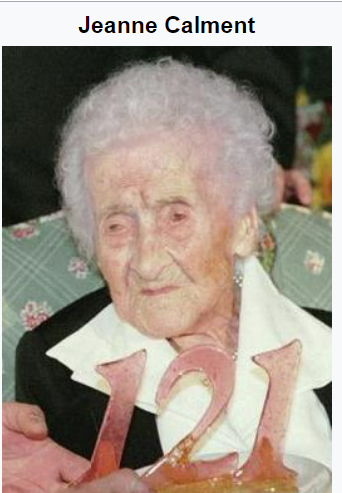


### A revoir

In [17]:


def EsperancedeVieResiduelle(df=EXPOMORTData[(EXPOMORTData['SEXE']==2)],AgeActuel = 90):
    Esperance = 0 #Initialisation de l'espérance

    TotalPopulationVivant = 1 # au début on a 100% de la population des personnes d'Age Actuel
    for index, row in df.iterrows():  #on fait une boucle pour chaque année
        age = row['AGE']-AgeActuel
        Q = row['Qx']
        if age > 0:                    #si l'age est au dessus de l'age actuel, on ajoute cette age à l'espérance de vie en le pondérant par les personnes mourant cette année
            PopulationMourantDanslAnnee = TotalPopulationVivant * Q   #chaque année la population est réduite des personnes mourants
            Esperance = Esperance + age *PopulationMourantDanslAnnee
            TotalPopulationVivant = TotalPopulationVivant - PopulationMourantDanslAnnee   #chaque année la population est réduite des personnes mourants
 
    return Esperance

    
EsperancedeVieResiduelle()



4.846478644658811

l'espérance de vie résiduelle de Jeanne Calment était de 4.84 années lorsqu'elle avait 90 ans

#### Un exemple atypique.
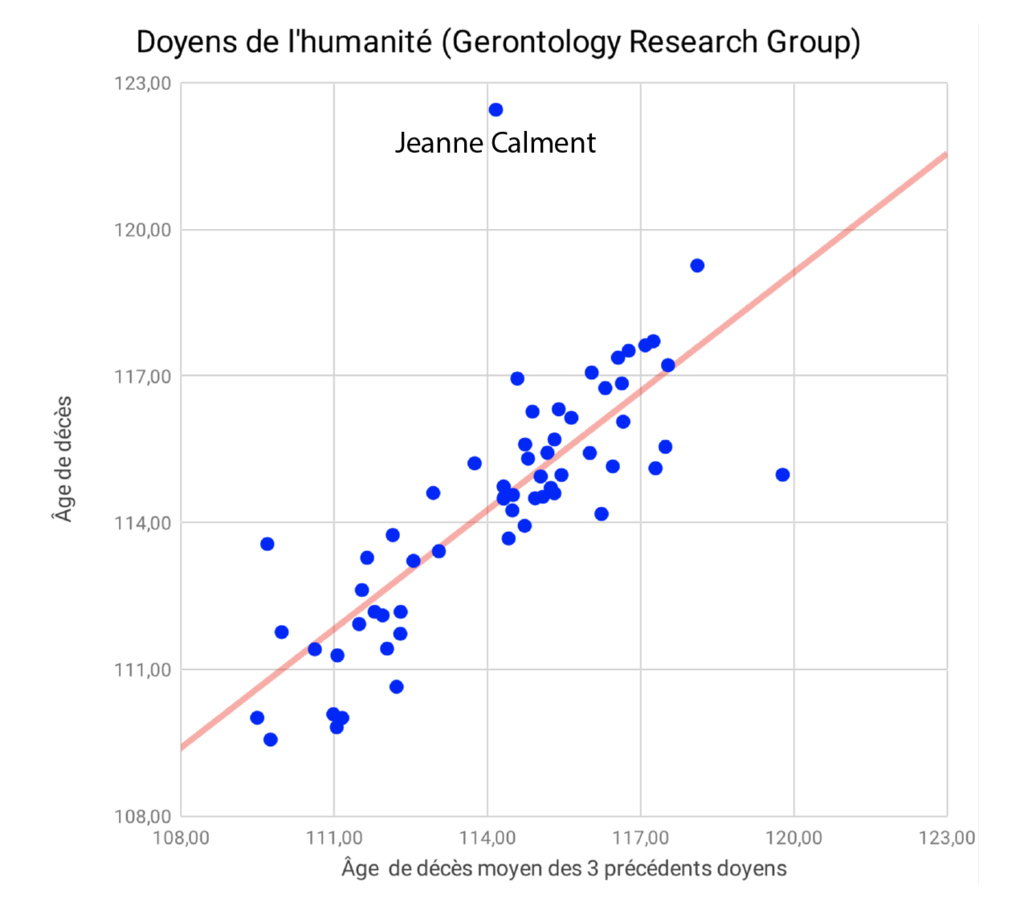

### Ce que l'on retient : 
* ce serait plus facile de pouvoir avoir une suite géometrique pour les calculs.


# On l'on essaye de créer une table de mortalité prédictive

# Extrapoler quand on n'a pas assez de données

> La *table de mortalité statique*, périodique ou instantanée (ou « table de mortalité du moment ») permet de caractériser la mortalité d’une population à un moment précis, toutes générations confondues. Ce tableau suppose une certaine stabilité des décès dans le futur. 


> La *table dynamique ou prospective* (ou « table de mortalité par génération ») intègre l’âge et le temps dans la probabilité de décès. Elle est établie à partir d’une génération réelle (et non fictive comme la précédente table), observant les niveaux de mortalité réels en fonction de l’année de naissance. Si elle est plus représentative que l’autre, elle ne peut se construire qu’à la fin d’une génération ou par *extrapolation*.  
[source](https://www.wedou.fr/definitions/tables-de-mortalite#:~:text=La%20table%20de%20mortalit%C3%A9%20statique,des%20d%C3%A9c%C3%A8s%20dans%20le%20futur.)

### Diagramme de Lexis
https://en.wikipedia.org/wiki/Lexis_diagram

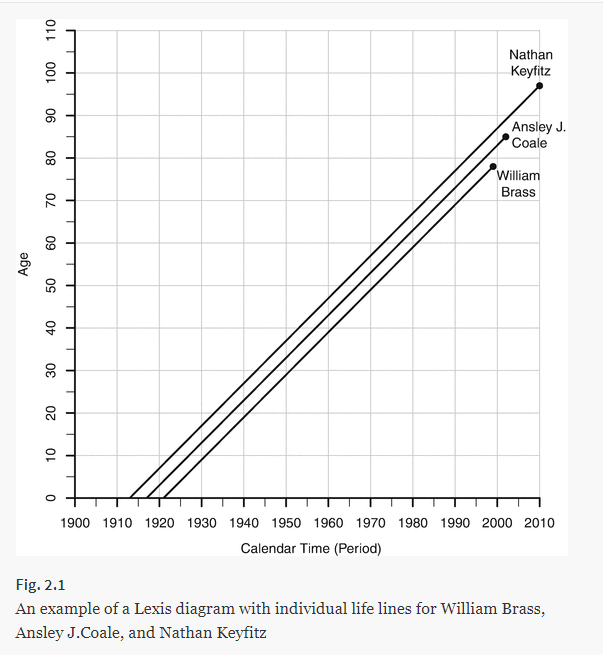


source : [Lexis Diagram](https://link.springer.com/chapter/10.1007/978-3-319-64820-0_2)



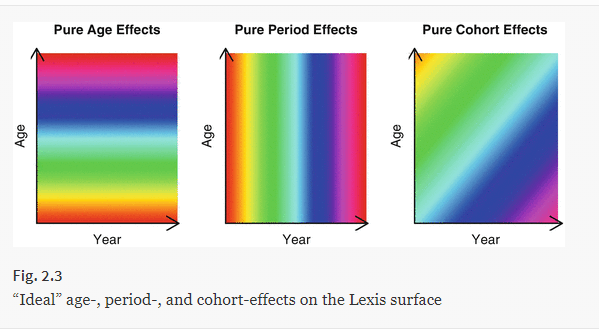


Quelques exemples : 
* un effet "covid" sera un effet de période, touchant l'année 2020 et 2021
* une guerre aura normalement un effet cohorte important, touchant les jeunes en âge de combattre
* améliorer le risque en mobylette aura un effet âge (réduisant fortement la mortalité des 14-25 ans)

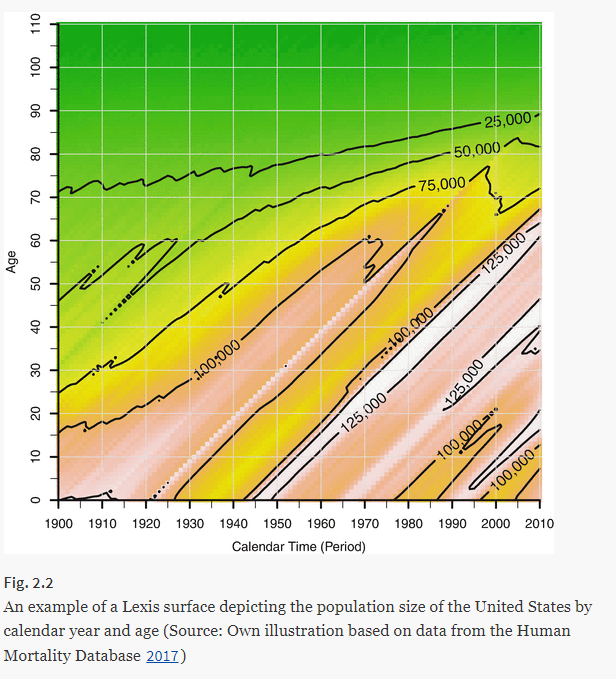



en dehors de l'effet age structurel, on voit que la déformation de la mortalité se fait par cohorte.

 ### Exercice (compliqué) 10 points à se partager pour le groupe qui fait le travail (5 pts max par personne ;)
    Les diagrammes de Lexis ne sont pas réellement programmés en Python alors qu'ils ne sont en R. 
    L'idée est de pouvoir graphiquer automatiquement la fig. 2.2 en plus du graphe sous jacent (on peut le faire via matrice colorée)

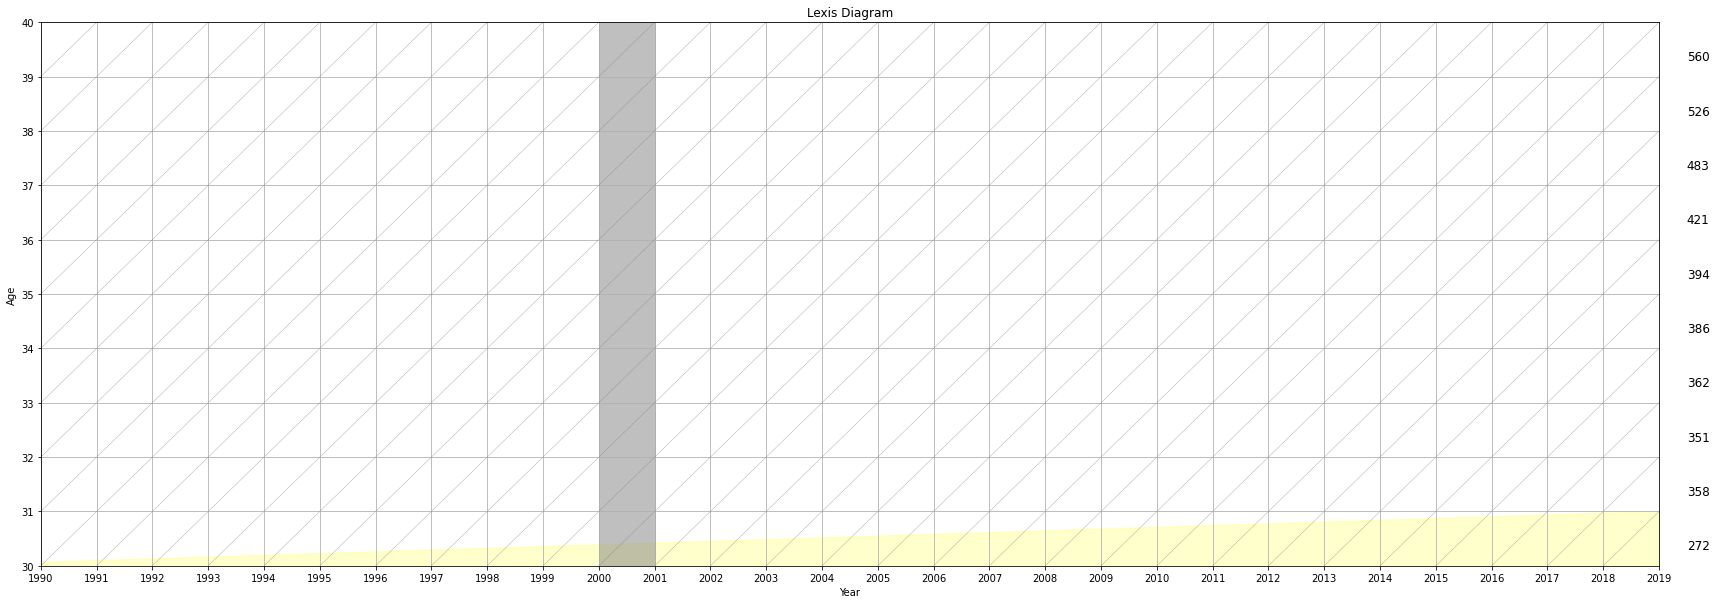

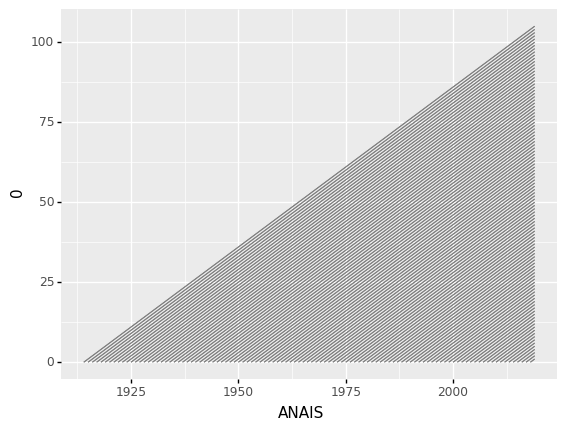

In [18]:
 
import pylexis
from plotnine import ggplot, geom_point, aes, geom_violin,theme,theme_minimal,geom_jitter,geom_segment

diagrammeLexis = pylexis.Diagram(1990, 2019, 30, 40)
diagrammeLexis.lexis_fill('cohort', 1988, "yellow")
diagrammeLexis.lexis_fill('year', 2000, "gray")


def AjouterPersonne(df=DEATHSynthese):
    df=df.reset_index()
    df = df[(df['SEXE']==1)]
    for index, row in df.iterrows():
        age= 2019-row['ANAIS']
        if age in range(30,40):diagrammeLexis.add_deaths(row['ANAIS'],2019,age,row['NombreMorts'])
AjouterPersonne()   


print(ggplot(EXPOData)
      +aes(x='ANAIS', xend=2019, y=0, yend='AGE')+
geom_segment(size=.4, colour="grey")
     )
 

### *Extrapoler* ou *Interpoler* ?

Ce qu'en pense Yann le Cun, l'un des fondateurs de l'Apprentissage profondu (deep learning)
https://www.youtube.com/watch?v=86ib0sfdFtw

> Pour opposer les deux, 
- Inter-poler, c'est quand on reste dans l'espace où on a des observations (par exemple, quelle est la probabilité de mourir dans l'année à 31.5 ans). Dans ce cas, le choix du modèle est moins important.
- Extra-poler, c'est quand on quitte l'espace où on a des observations ("quelle est la probabilité de mourir dans l'année d'une personne de 115 ans ?). Dans ce cadre, le choix du modèle est important.

## Gompetz, Makeham et Compagnie : les principaux modèles utilisés

Avant de regarder les modèles utilisés, regardons les propriétés que nous avons pu établir : 

#### Propriété 1 : 
> $q_x$ croissant avec l'âge : chaque année, notre probabilité de mourir augmente.

Cette propriété parait assez classique mais en pratique, elle n'est pas toujours respectée. Par exemple, on constate un mortalité importante des jeunes sur la route  : 
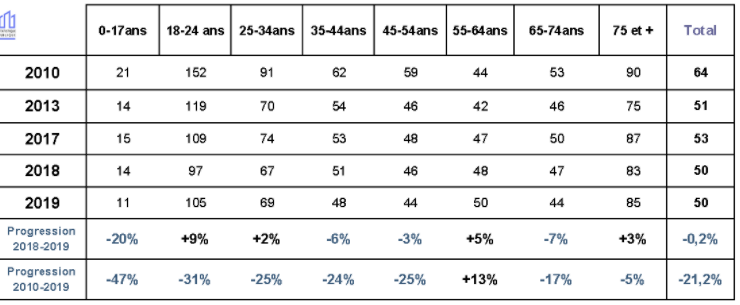

qui a longtemps fait une "bosse" de surmortalité autour de 18-25 ans surtout pour les hommes : 
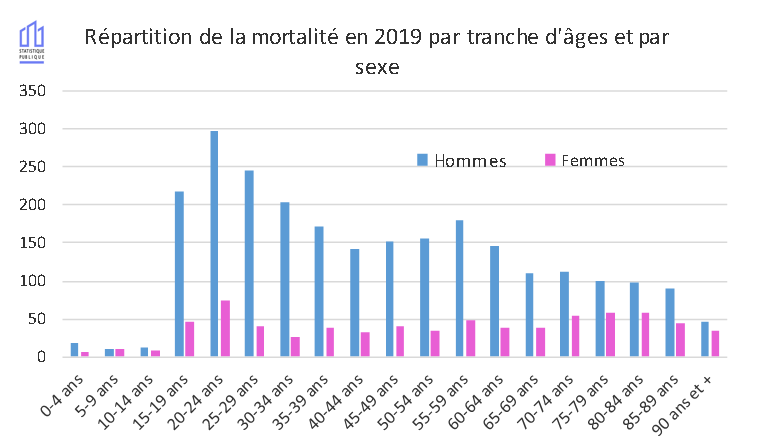


Source : [Sécurité routière](https://www.onisr.securite-routiere.gouv.fr/etat-de-l-insecurite-routiere/bilans-annuels-de-la-securite-routiere/bilan-2019-de-la-securite-routiere#:~:text=La%20mortalit%C3%A9%20rapport%C3%A9e%20%C3%A0%20la,tu%C3%A9s%20par%20million%20d'habitants.)

In [19]:
EXPOMORTData[(EXPOMORTData['SEXE']==1) & (EXPOMORTData['AGE'].between(14, 30, inclusive = True) )]


C:\Users\guill\AppData\Local\Temp\ipykernel_12204\588516679.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.


,SEXE,ANAIS,AGE,EXPOSITION,CENSURE,NombreMorts,Lx,Lx1,Px,Qx
14,1,2005,14,405934,False,44,405934,405890,0.999892,0.000108
15,1,2004,15,405931,False,73,405931,405858,0.999820,0.000180
16,1,2003,16,405172,False,74,405172,405098,0.999817,0.000183
17,1,2002,17,405928,False,136,405928,405792,0.999665,0.000335
18,1,2001,18,410971,False,149,410971,410822,0.999637,0.000363
19,1,2000,19,413039,False,209,413039,412830,0.999494,0.000506
20,1,1999,20,385174,False,218,385174,384956,0.999434,0.000566
21,1,1998,21,378431,False,225,378431,378206,0.999405,0.000595
22,1,1997,22,362439,False,205,362439,362234,0.999434,0.000566
23,1,1996,23,361955,False,211,361955,361744,0.999417,0.000583


In [20]:
ImprimeModalite('SEXE')

,COD_MOD,LIB_MOD
149,1,Masculin
150,2,Féminin


### Définition du taux instantané de mortalité

#### Rappel de la définition de $q_x$

> Le taux de mortalité $q_{x,t}$ est la probabilité qu'une personne d'âge $x$ vivant au moment $t$ meurt dans l'année ($t$,$t+1$)

Dans la pratique, le passage par des modèles paramétriques fait que l'on préfère utiliser un modèle continu et non un modèle instantané.





#### Définition de la force de mortalité 
> On note la *force de mortalité* au moment $t$ pour les personnes d'age $x$ par $\mu_{x,t}$. 
On peut aussi considérer cette force de mortalité $\mu_{x,t}$ comme le *taux de mortalité instantané*. 
La probabilité qu'une personne soumise à cette force $\mu_{x,t}$ meurt dans l'intervalle (t,t+dt) est approximativement $\mu_{x,t}dt$ quand $dt$ est petit.

#### Exercice
Démontrer La probabilité qu'une personne soumise à cette force $\mu_{x,t}$ meurt dans l'intervalle (t,t+dt) est approximativement $\mu_{x,t}dt$ quand $dt$ est petit en utilisant les développement limités.


### Lien entre $\mu_{x,t}$ et $q_{x,t}$

En considérant que $\mu_{x,t}dt$ est constant entre $x$ et $x+1$, on peut démontrer que : 
    $$ q_{x,t} \approx 1 - exp(-\mu_{x,t}) $$

#### Exercice
Démontrer cette approximation. 
Element de réponse en note de page [^1]. 



[^1]: Element de réponse
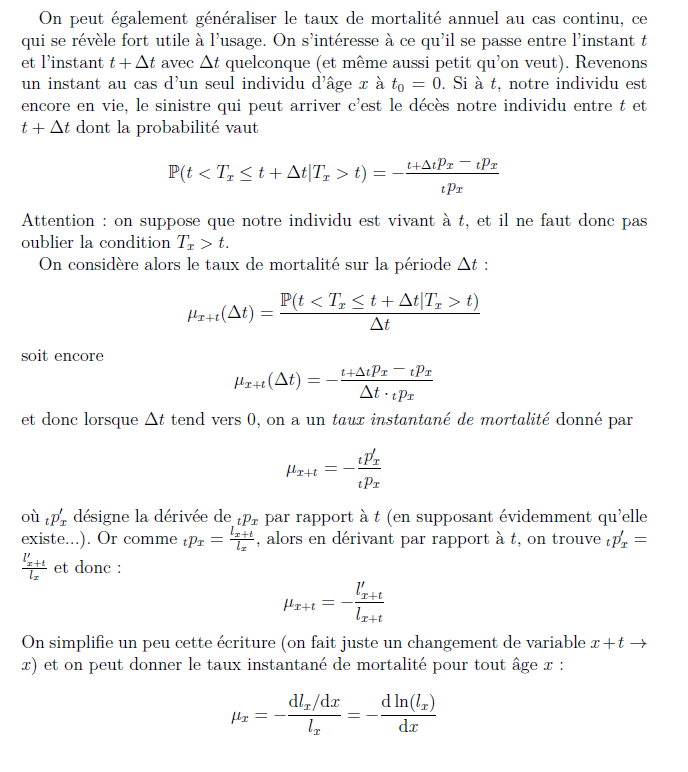

### Modèle de Gompetz

Gompertz (1825) a observé que la force de mortalité $\mu_x$ , lorsqu'elle était tracée sur l'échelle logarithmique, était
âge approximativement linéaire pendant la majeure partie de la vie adulte. 
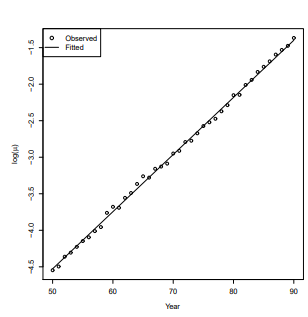


Ainsi, sur les données masculines américaines en 1960, on voit que le modèle de Gompertz semble s'adapter très bien aux données
Pratiquement, $\mu_x$  augmente de façon exponentielle avec l'âge :
$$ \mu_x = Bc^{x}  $$ où $B$ et $c$ sont des constantes.


* les actuaires utilisent plutôt la notation $\mu_x = e^{\theta_0 + \theta_1 x}$
* $\mu_x$ respecte notre première propriété et augmente avec l'âge.

Cependant, se pose le problème de prendre en compte les causes de décès qui ne seraient pas directement liées à l'âge.

C'est ainsi que William Makeham propose d'extrapoler $\mu_x$ aux grands âges sur la base d'une loi de Gompertz modifiée et tenant compte des causes de décès indépendantes de l'âge :
$$ \mu_x = A + Bc^{x}  $$
où $A$ est le risque de mourir pour l'ensemble des causes indépendantes de l'âge.

source : [wikipedia](https://fr.wikipedia.org/wiki/Mod%C3%A8le_de_Gompertz)

In [21]:
# Fonction permettant de grapher en scatter plot un ou deux graphes
def GraphiqueTaux(data,x1,y1,y2=None,y3=None,titre=None,Varhue=None):
    f, ax = plt.subplots(figsize=(7, 5))
    sns.despine(f)
    sns.scatterplot(data=data,x=x1, y=y1,
                hue=Varhue,      
                palette="ch:r=-.2,d=.3_r" ,label=y1,
                sizes=(1, 8), linewidth=0,
                  ax=ax)
    if y2 is not None:
        sns.scatterplot(data=data,x=x1, y=y2,    hue=Varhue,   
                palette="ch:r=-.2,d=.3_r" ,label=y2,
                sizes=(1, 8), linewidth=0,
                  ax=ax)
    if y3 is not None:
        sns.scatterplot(data=data,x=x1, y=y3,   hue=Varhue,   
                palette="ch:r=-.2,d=.3_r" ,label=y3,
                sizes=(1, 8), linewidth=0,
                  ax=ax)    
    ax.set_title(titre)
    ax.legend()     
    ax.set_yscale('log')



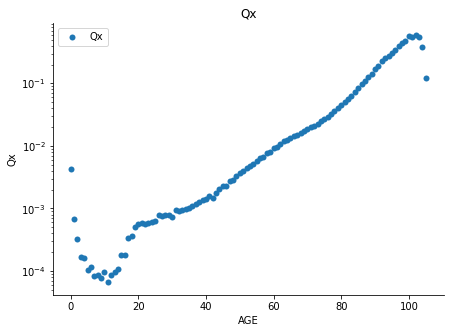

In [22]:
GraphiqueTaux(EXPOMORTData[(EXPOMORTData['SEXE']==1)],x1='AGE',y1='Qx',titre='Qx')

en passant au log : 
    $$ log(\mu_x) = log(B) + log(C)X$$
    
soit $$ log(\mu_x) = b + cX$$ par un changement des paramêtres.
    

On peut donc estimer avec un modèle lineaire généralisé Poisson (du fait de l'indépendance entre les x,t) et avec lien *log*. C'est ce qu'on appelle le *lien canonique* pour une GLM avec une erreur de Poisson (à retenir car TRES Utilisé !).
    
  A noter que l'on peut travailler directement sur le nombre de décès en ajoutant un *offset* sur l'évolution de la population $e_{x,t}$ est une mesure de la taille moyenne de la population âgée de $x$ à la date de l'année civile t, exposition dite centrale au risque. 
    
source :[Fitting models of mortality with generalized linear and
non-linear models](http://www.macs.hw.ac.uk/~iain/research/Paper_2013.pdf)
      $$ q_{x,t} \approx 1 - exp(-\mu_{x,t}) $$

In [23]:
EXPOMORTData['MUx'] = -np.log(-(EXPOMORTData['Qx']-1))

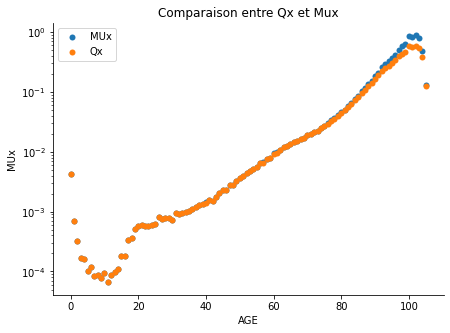

In [24]:
GraphiqueTaux(EXPOMORTData[(EXPOMORTData['SEXE']==1)],x1='AGE',y1='MUx',y2='Qx',titre='Comparaison entre Qx et Mux')

On voit que $q_x$ et $\mu_x$ sont très proches quand $q_x$ est stable.

### Modèle linéaire Généralisé

Pour programmer en python un GLM : [video](https://www.youtube.com/watch?v=__oC5IRCFKI)

source : [GLM: Fitting models of mortality  - I Currie ](http://www.macs.hw.ac.uk/~iain/research/Paper_2013.pdf)

In [45]:
Resultat = EXPOMORTData

In [66]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

 

In [47]:
# module imports

from formulaic import model_matrix # permet d'utiliser des formules comme dans R
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    MUx   No. Observations:                  212
Model:                            GLM   Df Residuals:                      210
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46.152
Date:                Wed, 16 Mar 2022   Deviance:                       53.843
Time:                        12:13:50   Pearson chi2:                     106.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.02913
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            0.0272      0.008      3.396      0.001       0.012       0.043
SEXE          -3.0532      0.524     -5.831      0.000      -4.079      -2.027
==============================================================================
"""

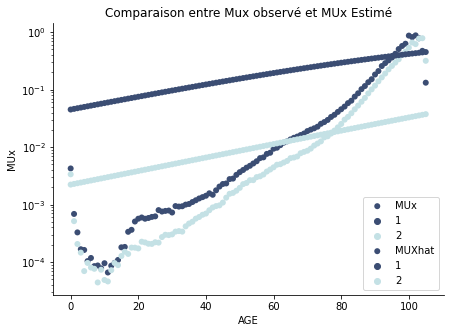

### Fonction permettant de calculer le GLM

In [174]:
 def CalculGLMGraph(dataEntree,formula,dist=sm.families.Poisson,Fonctionlien=sm.families.links.log(),monOffset=None,ImpressionInfluence=False,
                   VarY='MUx',VarXGraph='AGE',VarXGraphCateg='SEXE', VarPredict='MUxHat',  titre='Comparaison entre Mux observé et MUx Estimé',     
      ):
        # Mise en forme des données : on n'écrit pas sur la base d'entrée
        df = dataEntree.copy()
        y, X = model_matrix(formula,df) 

        # GLM proprement dite
        Result= sm.GLM(endog=y,exog=X,family=dist(link=Fonctionlien),offset=monOffset).fit()
        display(Result.summary())
        
        
        # Sortie des Stats d'influence (les points qui tirent les paramètres)
        if ImpressionInfluence is True:
            #Element d'influence
            influence = Result.get_influence(observed=False)
            cook_distance = influence.cooks_distance 
            (distance, p_value) = cook_distance
            f, ax = plt.subplots(figsize=(7, 5))
            sns.despine(f)
            sns.scatterplot(x=df[VarXGraph], y=df[VarY], hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)
            ax.set_title('influence de chaque point') 
        
        # Variable prédite calculée pour chaque observation puis graphée
        df[VarPredict] = Result.predict(X,offset=monOffset)        
        GraphiqueTaux(data=df,x1=VarXGraph,y1=VarY,y2=VarPredict,Varhue=VarXGraphCateg,titre=titre)
 

#### Cas 1 (ne marche pas très bien) Regression (GLM) de MUx en fonction du sexe et de l'âge (sans intercept)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    MUx   No. Observations:                  212
Model:                            GLM   Df Residuals:                      210
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53.156
Date:                Wed, 16 Mar 2022   Deviance:                       49.151
Time:                        17:05:15   Pearson chi2:                     135.
No. Iterations:                     6   Pseudo R-squ. (CS):           0.005298
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            0.0208      0.007      3.034      0.002       0.007       0.034
SEXE          -2.9080      0.484     -6.014      0.000      -3.856      -1.960
==============================================================================
"""

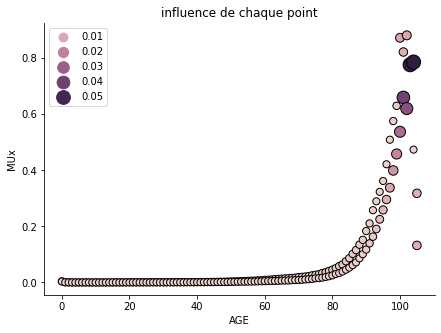

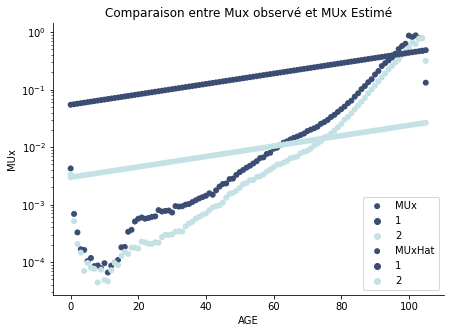

In [175]:
CalculGLMGraph(dataEntree=Resultat,
         formula = 'MUx ~ SEXE + AGE  -1 ',
               VarY='MUx',VarXGraph='AGE',VarXGraphCateg='SEXE', 
               ImpressionInfluence=True,VarPredict='MUxHat',  titre='Comparaison entre Mux observé et MUx Estimé',     
               dist=sm.families.Poisson,Fonctionlien=sm.families.links.log())       

#### Cas 2(marche mieux !) Regression (GLM) de MUx en fonction du sexe x l'âge (sans intercept)
C'est à dire que l'on considère les tables de mortalité par sexe de façon complétement indépendantes (alors que sinon, on considère la déterioration de la mortalité en fonction de l'âge la même selon les sexes)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    MUx   No. Observations:                  212
Model:                            GLM   Df Residuals:                      209
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30.448
Date:                Wed, 16 Mar 2022   Deviance:                       3.7346
Time:                        17:05:27   Pearson chi2:                     343.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1971
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.0069      0.008     -0.846      0.398      -0.023       0.009
SEXE          -8.5967      1.910     -4.501      0.000     -12.340      -4.854
AGE:SEXE       0.0856      0.019      4.553      0.000       0.049       0.122
==============================================================================
"""

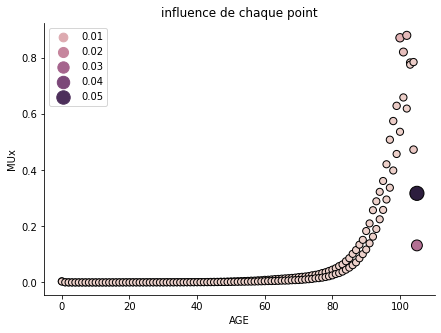

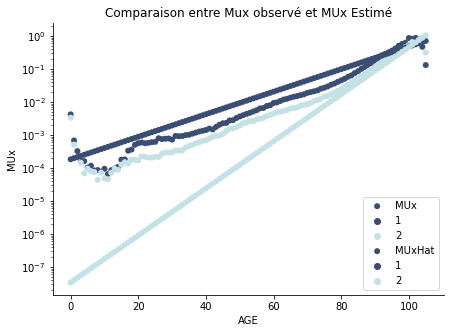

In [176]:
        
CalculGLMGraph(dataEntree=Resultat,
         formula = 'MUx ~ SEXE * AGE  -1 ',VarY='MUx',VarXGraph='AGE',VarXGraphCateg='SEXE', ImpressionInfluence=True,VarPredict='MUxHat',  titre='Comparaison entre Mux observé et MUx Estimé',     
         dist=sm.families.Poisson,Fonctionlien=sm.families.links.log())       

Alors que la pente de l'âge n'est pas très significative, la pente de l'âge tenant compte du sexe l'est ! et le fit bien meilleur, surtout pour les hommes

### Cas 3 : modèle logistique (link = logit et binomial au lieu de Poisson)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    MUx   No. Observations:                  212
Model:                            GLM   Df Residuals:                      209
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22.117
Date:                Wed, 16 Mar 2022   Deviance:                       5.7721
Time:                        17:05:35   Pearson chi2:                 2.64e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2261
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.0016      0.011     -0.151      0.880      -0.023       0.020
SEXE         -10.7754      2.547     -4.230      0.000     -15.768      -5.782
AGE:SEXE       0.1089      0.026      4.203      0.000       0.058       0.160
==============================================================================
"""

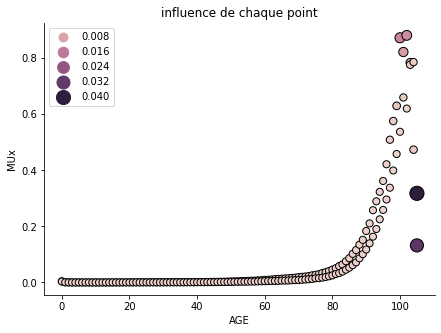

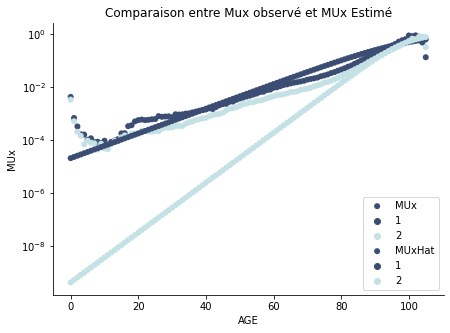

In [177]:
CalculGLMGraph(dataEntree=Resultat,
         formula = 'MUx ~ SEXE * AGE  -1 ',VarY='MUx',VarXGraph='AGE',VarXGraphCateg='SEXE', ImpressionInfluence=True,VarPredict='MUxHat',  titre='Comparaison entre Mux observé et MUx Estimé',     
         dist=sm.families.Binomial,Fonctionlien=sm.families.links.logit())         

### Cas 4 : modèle binomial (link = log)

C:\Users\guill\anaconda3\envs\Cours\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The log link function does not respect the domain of the Binomial family.


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    MUx   No. Observations:                  212
Model:                            GLM   Df Residuals:                      209
Model Family:                Binomial   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22.894
Date:                Wed, 16 Mar 2022   Deviance:                       7.3263
Time:                        17:06:09   Pearson chi2:                     94.7
No. Iterations:                    28   Pseudo R-squ. (CS):             0.2204
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.0055      0.006     -0.926      0.354      -0.017       0.006
SEXE          -7.9165      1.567     -5.052      0.000     -10.988      -4.845
AGE:SEXE       0.0772      0.015      5.116      0.000       0.048       0.107
==============================================================================
"""

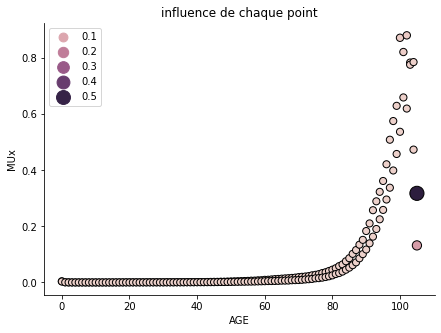

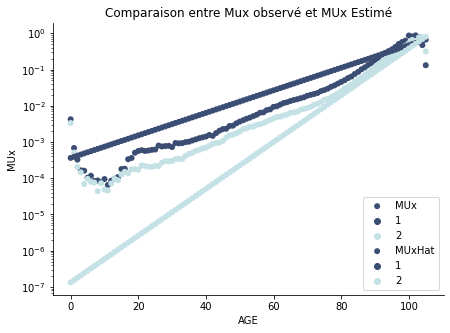

In [178]:
CalculGLMGraph(dataEntree=Resultat,
         formula = 'MUx ~ SEXE * AGE  -1 ',VarY='MUx',VarXGraph='AGE',VarXGraphCateg='SEXE', VarPredict='MUxHat',  titre='Comparaison entre Mux observé et MUx Estimé',     
         dist=sm.families.Binomial,Fonctionlien=sm.families.links.log(), ImpressionInfluence=True)       

### Cas 5 : on applique directement à la mortalité (en tenant compte de l'exposition en "offset")

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            NombreMorts   No. Observations:                  212
Model:                            GLM   Df Residuals:                      209
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -95870.
Date:                Wed, 16 Mar 2022   Deviance:                   1.8993e+05
Time:                        17:07:04   Pearson chi2:                 3.18e+07
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.0304   5.96e-05   -509.540      0.000      -0.030      -0.030
SEXE          -7.9637      0.006  -1443.341      0.000      -7.975      -7.953
AGE:SEXE       0.0918   5.84e-05   1571.573      0.000       0.092       0.092
==============================================================================
"""

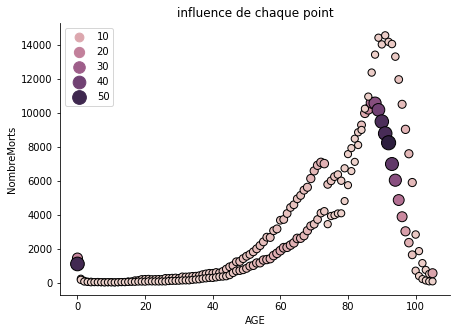

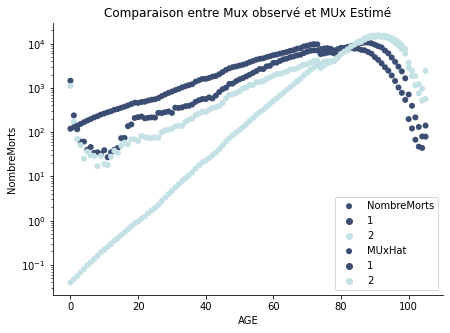

In [179]:
CalculGLMGraph(dataEntree=EXPOMORTData,
         formula = 'NombreMorts ~ AGE * SEXE  -1 ',VarY='NombreMorts',VarXGraph='AGE',VarXGraphCateg='SEXE', VarPredict='MUxHat',  titre='Comparaison entre Mux observé et MUx Estimé',     
         dist=sm.families.Poisson,Fonctionlien=sm.families.links.log(),monOffset=np.log(EXPOMORTData['EXPOSITION']), ImpressionInfluence=True)      

### Cas 6 : comme on voit que le problème vient des âges en dessous de 10 ans et au dessus de 95 ans, on se limiete à ces ages

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    MUx   No. Observations:                  172
Model:                            GLM   Df Residuals:                      169
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13.892
Date:                Wed, 16 Mar 2022   Deviance:                      0.72244
Time:                        17:10:16   Pearson chi2:                     3.43
No. Iterations:                     7   Pseudo R-squ. (CS):            0.07009
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.0168      0.016     -1.030      0.303      -0.049       0.015
SEXE          -9.2887      3.375     -2.752      0.006     -15.904      -2.673
AGE:SEXE       0.1000      0.037      2.728      0.006       0.028       0.172
==============================================================================
"""

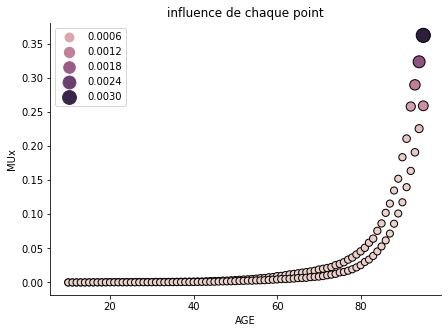

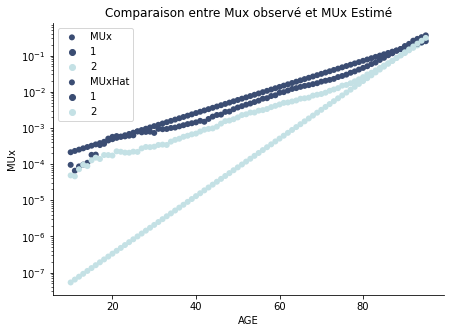

In [182]:


#print(base)
CalculGLMGraph(dataEntree=EXPOMORTData.loc[(EXPOMORTData['AGE'].between(10,95)),:], formula = 'MUx ~ SEXE * AGE   -1',VarY='MUx',VarXGraph='AGE',VarXGraphCateg='SEXE', VarPredict='MUxHat',  titre='Comparaison entre Mux observé et MUx Estimé',         dist=sm.families.Poisson,Fonctionlien=sm.families.links.log(), ImpressionInfluence=True)  
  

les résultats restent décevants pour les femmes

Le modèle de Gompertz ne capture pas la très forte augmentation à 80 ans surtout pour les femmes.

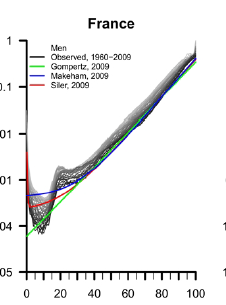

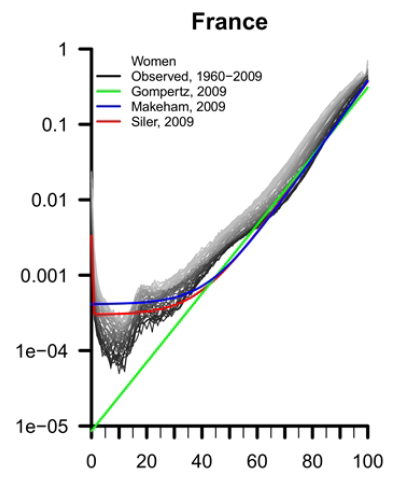
[source: Gompertz, Makeham, and Siler models explain Taylor's law in human mortality data](https://www.researchgate.net/profile/Christina-Bohk-Ewald/publication/323495451_Gompertz_Makeham_and_Siler_models_explain_Taylor%27s_law_in_human_mortality_data/links/5edfb6b6299bf1d20bde9227/Gompertz-Makeham-and-Siler-models-explain-Taylors-law-in-human-mortality-data.pdf)

#### Entropie
La baisse des taux de mortalités aux âges jeunes, sans pour autant que l’âge ultime de vie semble évoluer sensiblement, a pour conséquence un phénomène d’« orthogonalisation » des tables de mortalité, de plus en plus de personnes décédant à un âge élevé :
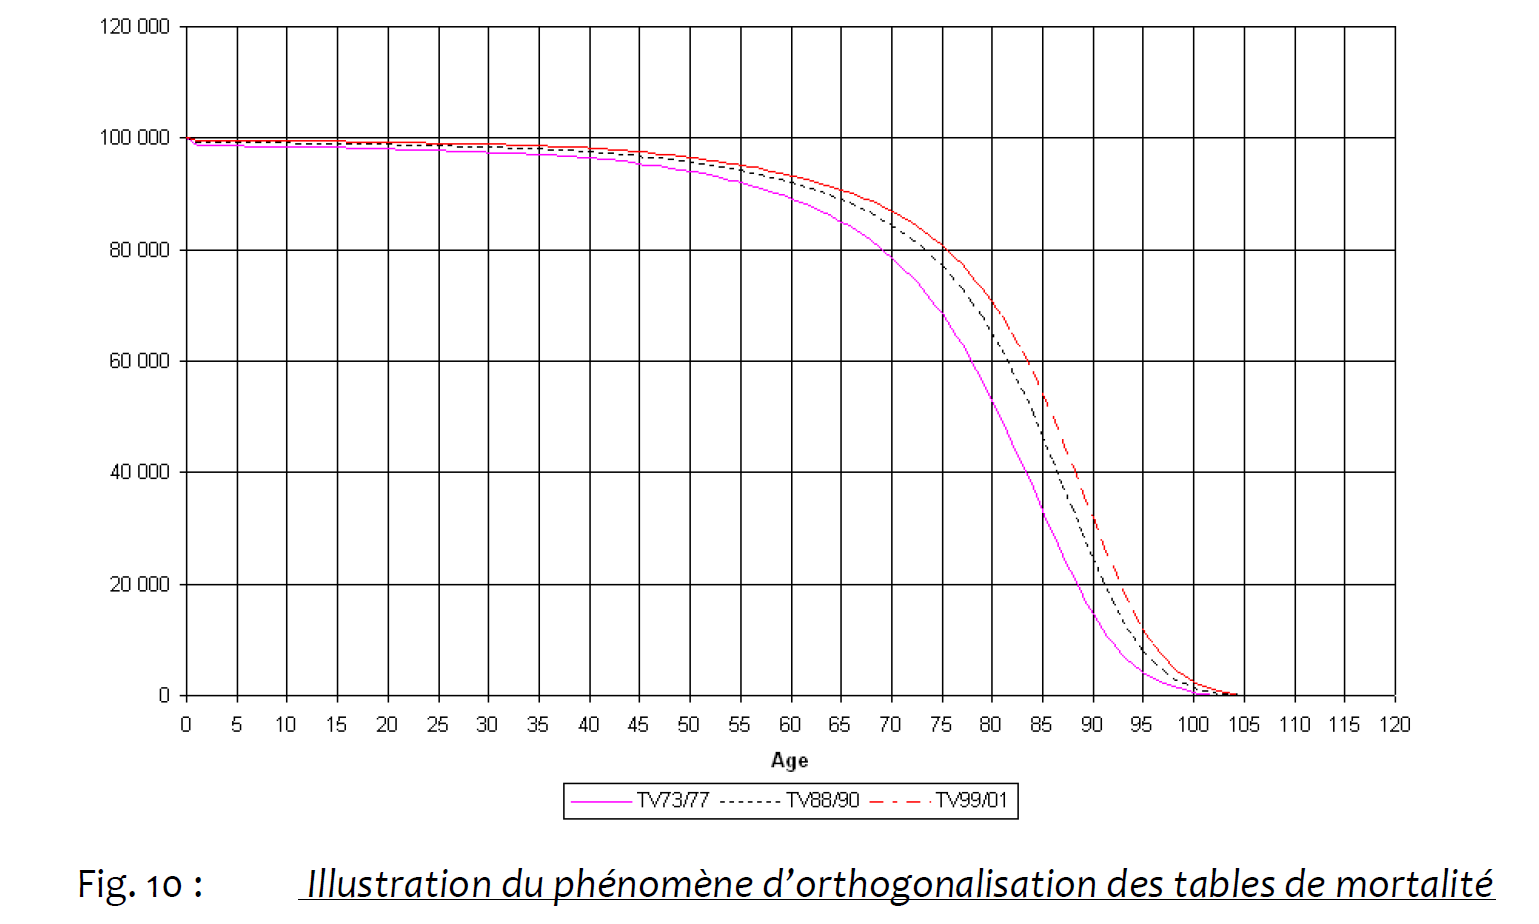
[source Frédéric PLANCHET ](http://www.ressources-actuarielles.net/C1256F13006585B2/0/1430AD6748CE3AFFC1256F130067B88E/$FILE/Seance4.pdf?OpenElement)

#### Exercice (compliqué) 
Montrer qu'il est équivalent d'utiliser un modèle GLM avec $Y=q_x$, une distribution binomiale et une fonction Link cloglog 
[solution](http://www.macs.hw.ac.uk/~iain/research/Paper_2013.pdf)

### Réhabiliter Duvillard ? Les modèles Additifs

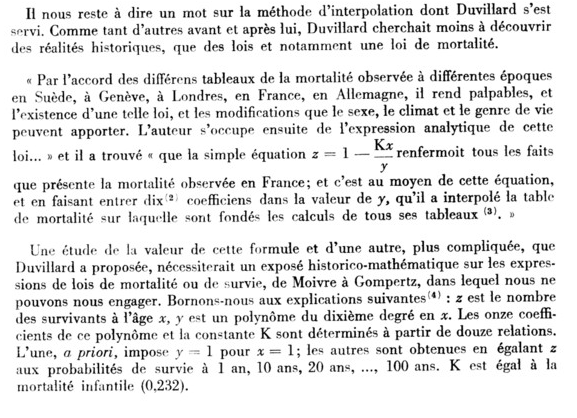
[table de Duvillard](https://www.persee.fr/doc/pop_0032-4663_1965_num_20_5_12929)

Soit $ l_x= z= 1-\frac{Kx}{y(x)}$. Le terme y(x) permet justement tenir compte de la propriété 1 en augmentant les décès avec l'âge.
Nous allons un modèle Additif Généralisé (GAM) qui exprime Y en fonction d'une fonction polynomiale de X :

$$ l_x= z= 1-\sum \beta_i{x^i}$$

In [ ]:
### Cas 7 : Modèle GAM : en pratique on utilise GLM

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    MUx   No. Observations:                  212
Model:                            GLM   Df Residuals:                      199
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29.136
Date:                Wed, 16 Mar 2022   Deviance:                       1.1118
Time:                        17:51:04   Pearson chi2:                     1.37
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2070
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
SEXE                               -5.2189     10.204     -0.511      0.609     -25.219      14.781
bs(AGE, df=6, degree=3)[1]        -10.9732     68.581     -0.160      0.873    -145.389     123.443
bs(AGE, df=6, degree=3)[2]         -9.7628     44.974     -0.217      0.828     -97.911      78.385
bs(AGE, df=6, degree=3)[3]         -2.2403     15.107     -0.148      0.882     -31.850      27.369
bs(AGE, df=6, degree=3)[4]         -5.2401      8.502     -0.616      0.538     -21.904      11.423
bs(AGE, df=6, degree=3)[5]          1.3413      3.706      0.362      0.717      -5.922       8.605
bs(AGE, df=6, degree=3)[6]         -0.9654      1.954     -0.494      0.621      -4.795       2.864
bs(AGE, df=6, degree=3)[1]:SEXE     6.9149     47.221      0.146      0.884     -85.636      99.466
bs(AGE, df=6, degree=3)[2]:SEXE     4.8057     33.355      0.144      0.885     -60.570      70.181
bs(AGE, df=6, degree=3)[3]:SEXE     4.0119     14.589      0.275      0.783     -24.581      32.605
bs(AGE, df=6, degree=3)[4]:SEXE     5.1272     11.783      0.435      0.663     -17.966      28.221
bs(AGE, df=6, degree=3)[5]:SEXE     4.3937     10.471      0.420      0.675     -16.130      24.917
bs(AGE, df=6, degree=3)[6]:SEXE     5.4619     10.285      0.531      0.595     -14.696      25.620
===================================================================================================
"""

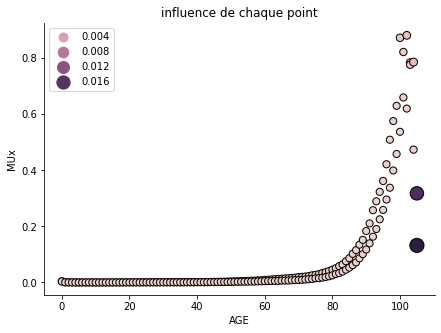

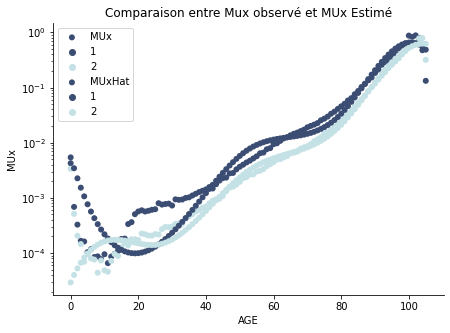

In [196]:
       
CalculGLMGraph(dataEntree=EXPOMORTData,
         formula = 'MUx  ~  SEXE * bs(AGE, df=6, degree=3) - 1',
         VarY='MUx',VarXGraph='AGE',VarXGraphCateg='SEXE', VarPredict='MUxHat',  
         titre='Comparaison entre Mux observé et MUx Estimé',     
         dist=sm.families.Poisson,Fonctionlien=sm.families.links.log(), ImpressionInfluence=True)              

In [ ]:
Il y a beaucoup de paramètres, certains ajoutant possiblement du bruit. il faut pour cela régulariser, ce que l'on ne peut pas faire pratiquement encore sur sm.GLM.
On doit donc utiliser une autre fonction de StatsModels :  GLMGam

In [243]:
from statsmodels.gam.api import GLMGam, BSplines
def CalculGAMGraph(dataEntree,
                   dist=sm.families.Poisson,Fonctionlien=sm.families.links.log(),ImpressionInfluence=False,
                   VarY='MUx',
                   VarX=['AGE','SEXE'],VarXGraph='AGE',VarXGraphCateg='SEXE', VarXSpline='AGE',monOffset=None,
                   VarPredict='MUxHat', 
                   titre='Comparaison entre Mux observé et MUx Estimé',      ):
        # Mise en forme des données : on n'écrit pas sur la base d'entrée
        df = dataEntree.copy()
        y = df[VarY]
        X = df[VarX]
        x_spline = df[VarXSpline]
        bs = BSplines(x_spline, df=[12], degree=[3])
     
        # penalization afin de ne pas surapprendre 
        alpha = np.array([0.5])
        model = sm.GLMGam(y,X,family=dist(link=Fonctionlien) ,smoother=bs,  alpha=alpha)
    
        Result = model.fit()
    
        # optimisation de l'hyper parametre alpha par méthode des kfold
        alpha = model.select_penweight_kfold()[0]
        model = sm.GLMGam(y,X,family=dist(link=Fonctionlien) ,smoother=bs,  alpha=alpha)
        Result = model.fit()
        display(Result.summary())
        
        
        # Sortie des Stats d'influence (les points qui tirent les paramètres)
        if ImpressionInfluence is True:
            #Element d'influence
            influence = Result.get_influence(observed=False)
            cook_distance = influence.cooks_distance 
            (distance, p_value) = cook_distance
            f, ax = plt.subplots(figsize=(7, 5))
            sns.despine(f)
            sns.scatterplot(x=df[VarXGraph], y=df[VarY], hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)
            ax.set_title('influence de chaque point') 
        
        # Variable prédite calculée pour chaque observation puis graphée
        #df[VarPredict] = Result.predict(X,offset=monOffset)   
 
        df[VarPredict] =Result.get_prediction().predicted_mean
        GraphiqueTaux(data=df,x1=VarXGraph,y1=VarY,y2=VarPredict,Varhue=VarXGraphCateg,titre=titre)
        


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    MUx   No. Observations:                  212
Model:                         GLMGam   Df Residuals:                   202.95
Model Family:                 Poisson   Df Model:                         8.05
Link Function:                    log   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -30.293
Date:                Wed, 16 Mar 2022   Deviance:                       3.4247
Time:                        18:32:35   Pearson chi2:                     2.60
No. Iterations:                    11   Pseudo R-squ. (CS):             0.1983
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.0303      0.016     -1.872      0.061      -0.062       0.001
SEXE          -0.6203      0.422     -1.470      0.142      -1.447       0.207
AGE_s0        -5.8769      4.766     -1.233      0.218     -15.219       3.465
AGE_s1       -12.0915     14.366     -0.842      0.400     -40.249      16.066
AGE_s2        -9.0906     17.176     -0.529      0.597     -42.755      24.573
AGE_s3        -5.3566     10.620     -0.504      0.614     -26.171      15.458
AGE_s4        -3.9551      6.908     -0.573      0.567     -17.494       9.584
AGE_s5        -2.2449      4.755     -0.472      0.637     -11.564       7.074
AGE_s6        -1.6114      3.429     -0.470      0.638      -8.332       5.109
AGE_s7         0.4640      2.360      0.197      0.844      -4.161       5.089
AGE_s8         1.9592      1.988      0.986      0.324      -1.936       5.855
AGE_s9         4.2756      1.781      2.401      0.016       0.786       7.766
AGE_s10        3.1747      1.644      1.931      0.053      -0.047       6.397
==============================================================================
"""

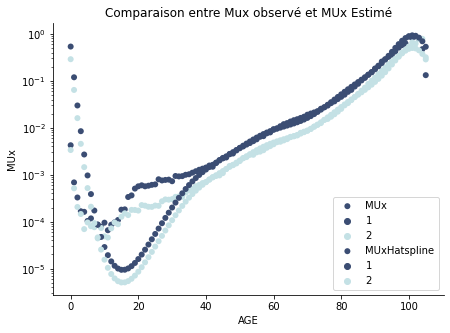

In [244]:
CalculGAMGraph(dataEntree=EXPOMORTData,
        VarY='MUx',
        VarX=['AGE','SEXE'],
        VarXSpline='AGE',
        VarXGraphCateg='SEXE', 
        VarPredict='MUxHatspline',  
        titre='Comparaison entre Mux observé et MUx Estimé',     
        dist=sm.families.Poisson,Fonctionlien=sm.families.links.log(), ImpressionInfluence=False)      
  

Dans ce modèle le spline par age est le même quelque soit le sexe mais on voit que c'est plutot pas mal.

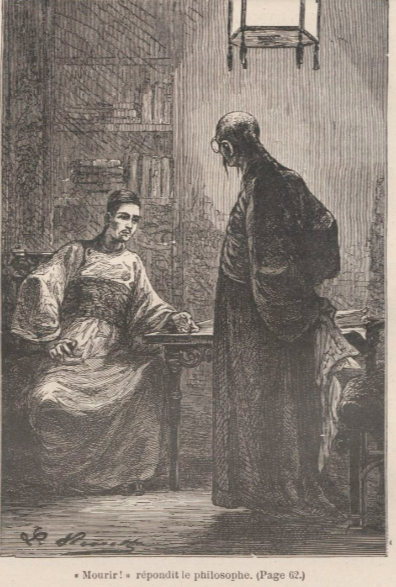

### Exercice :  Et l'on revient à Titanic !
Après avoir fait une table de mortalité, essayer de faire une régression GLM de type logistique (link = logit, dist=Binomial) sur la variable "survived" pour expliquer quelles variables expliquent la mortalité. Puis reculculer la prime à demander à Jack et Rose !

In [ ]:
titanic = sns.load_dataset('titanic')